In [6]:
## LEVEL-2
 # WINE QUALITY PREDICTION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/shiva/Documents/oasis/WineQT.csv")
df
 


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

c:\Users\shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Model: Random Forest
Accuracy: 0.6943231441048034
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 27 65  7  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]

Model: SGD
Accuracy: 0.6026200873362445
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.66      0.68      0.67        96
           6       0.62      0.67      0.64    

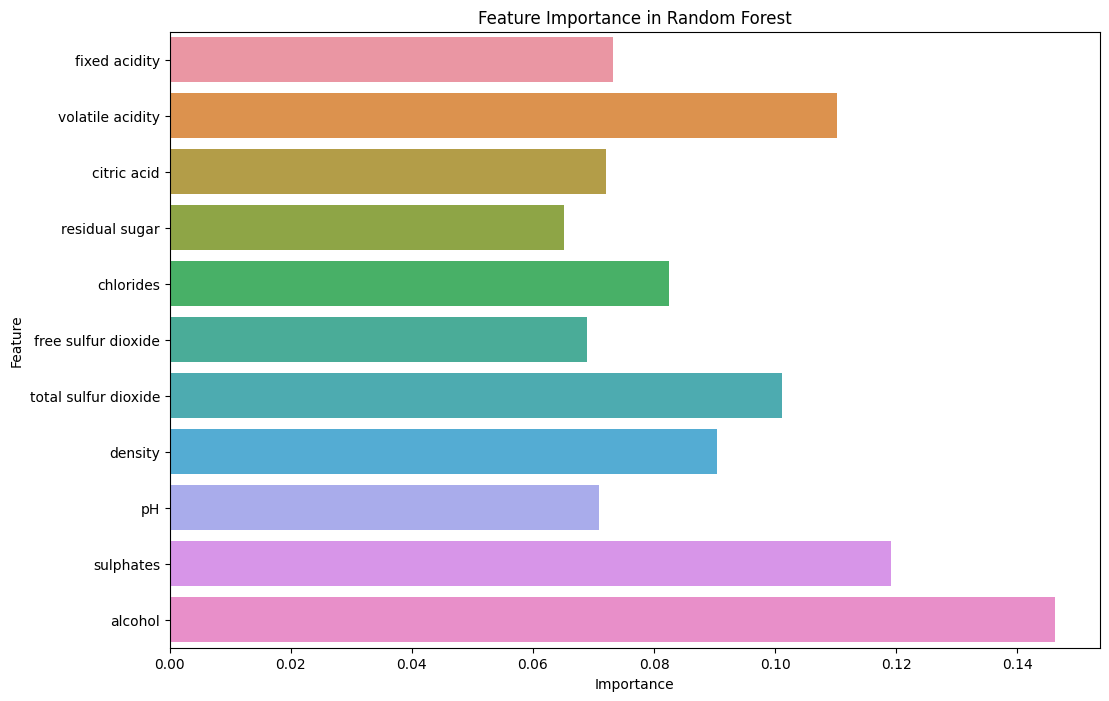

In [7]:
X = df.drop(columns=['quality', 'Id'])
y = df['quality']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Classifier Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])

# Analyze Feature Importance for Random Forest
rf_model = models['Random Forest']
feature_importance = rf_model.feature_importances_
features = X.columns

# Visualize Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [8]:
data_np = df.to_numpy()

# Extract feature and target arrays
features = data_np[:, :-2]  # Exclude 'quality' and 'Id' columns
target = data_np[:, -2]  # 'quality' column

# Basic Statistical Analysis using NumPy
mean_features = np.mean(features, axis=0)
std_features = np.std(features, axis=0)
min_features = np.min(features, axis=0)
max_features = np.max(features, axis=0)

# Print basic statistics
print("Mean of features:\n", mean_features)
print("\nStandard Deviation of features:\n", std_features)
print("\nMinimum values of features:\n", min_features)
print("\nMaximum values of features:\n", max_features)




Mean of features:
 [ 8.31111111  0.53133858  0.26836395  2.53215223  0.08693263 15.61548556
 45.91469816  0.99673041  3.31101487  0.65770779 10.4421114 ]

Standard Deviation of features:
 [1.74683037e+00 1.79554596e-01 1.96599794e-01 1.35532420e+00
 4.72466566e-02 1.02460011e+01 3.27677868e+01 1.92422483e-03
 1.56595513e-01 1.70324158e-01 1.08172210e+00]

Minimum values of features:
 [4.6     0.12    0.      0.9     0.012   1.      6.      0.99007 2.74
 0.33    8.4    ]

Maximum values of features:
 [ 15.9       1.58      1.       15.5       0.611    68.      289.
   1.00369   4.01      2.       14.9    ]


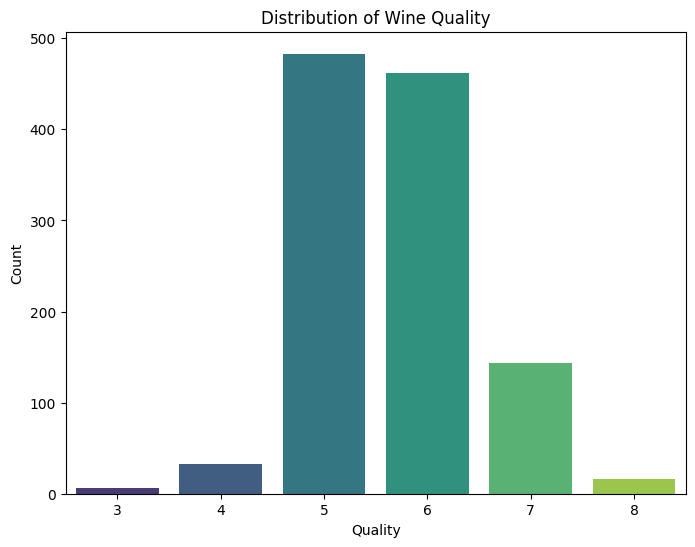

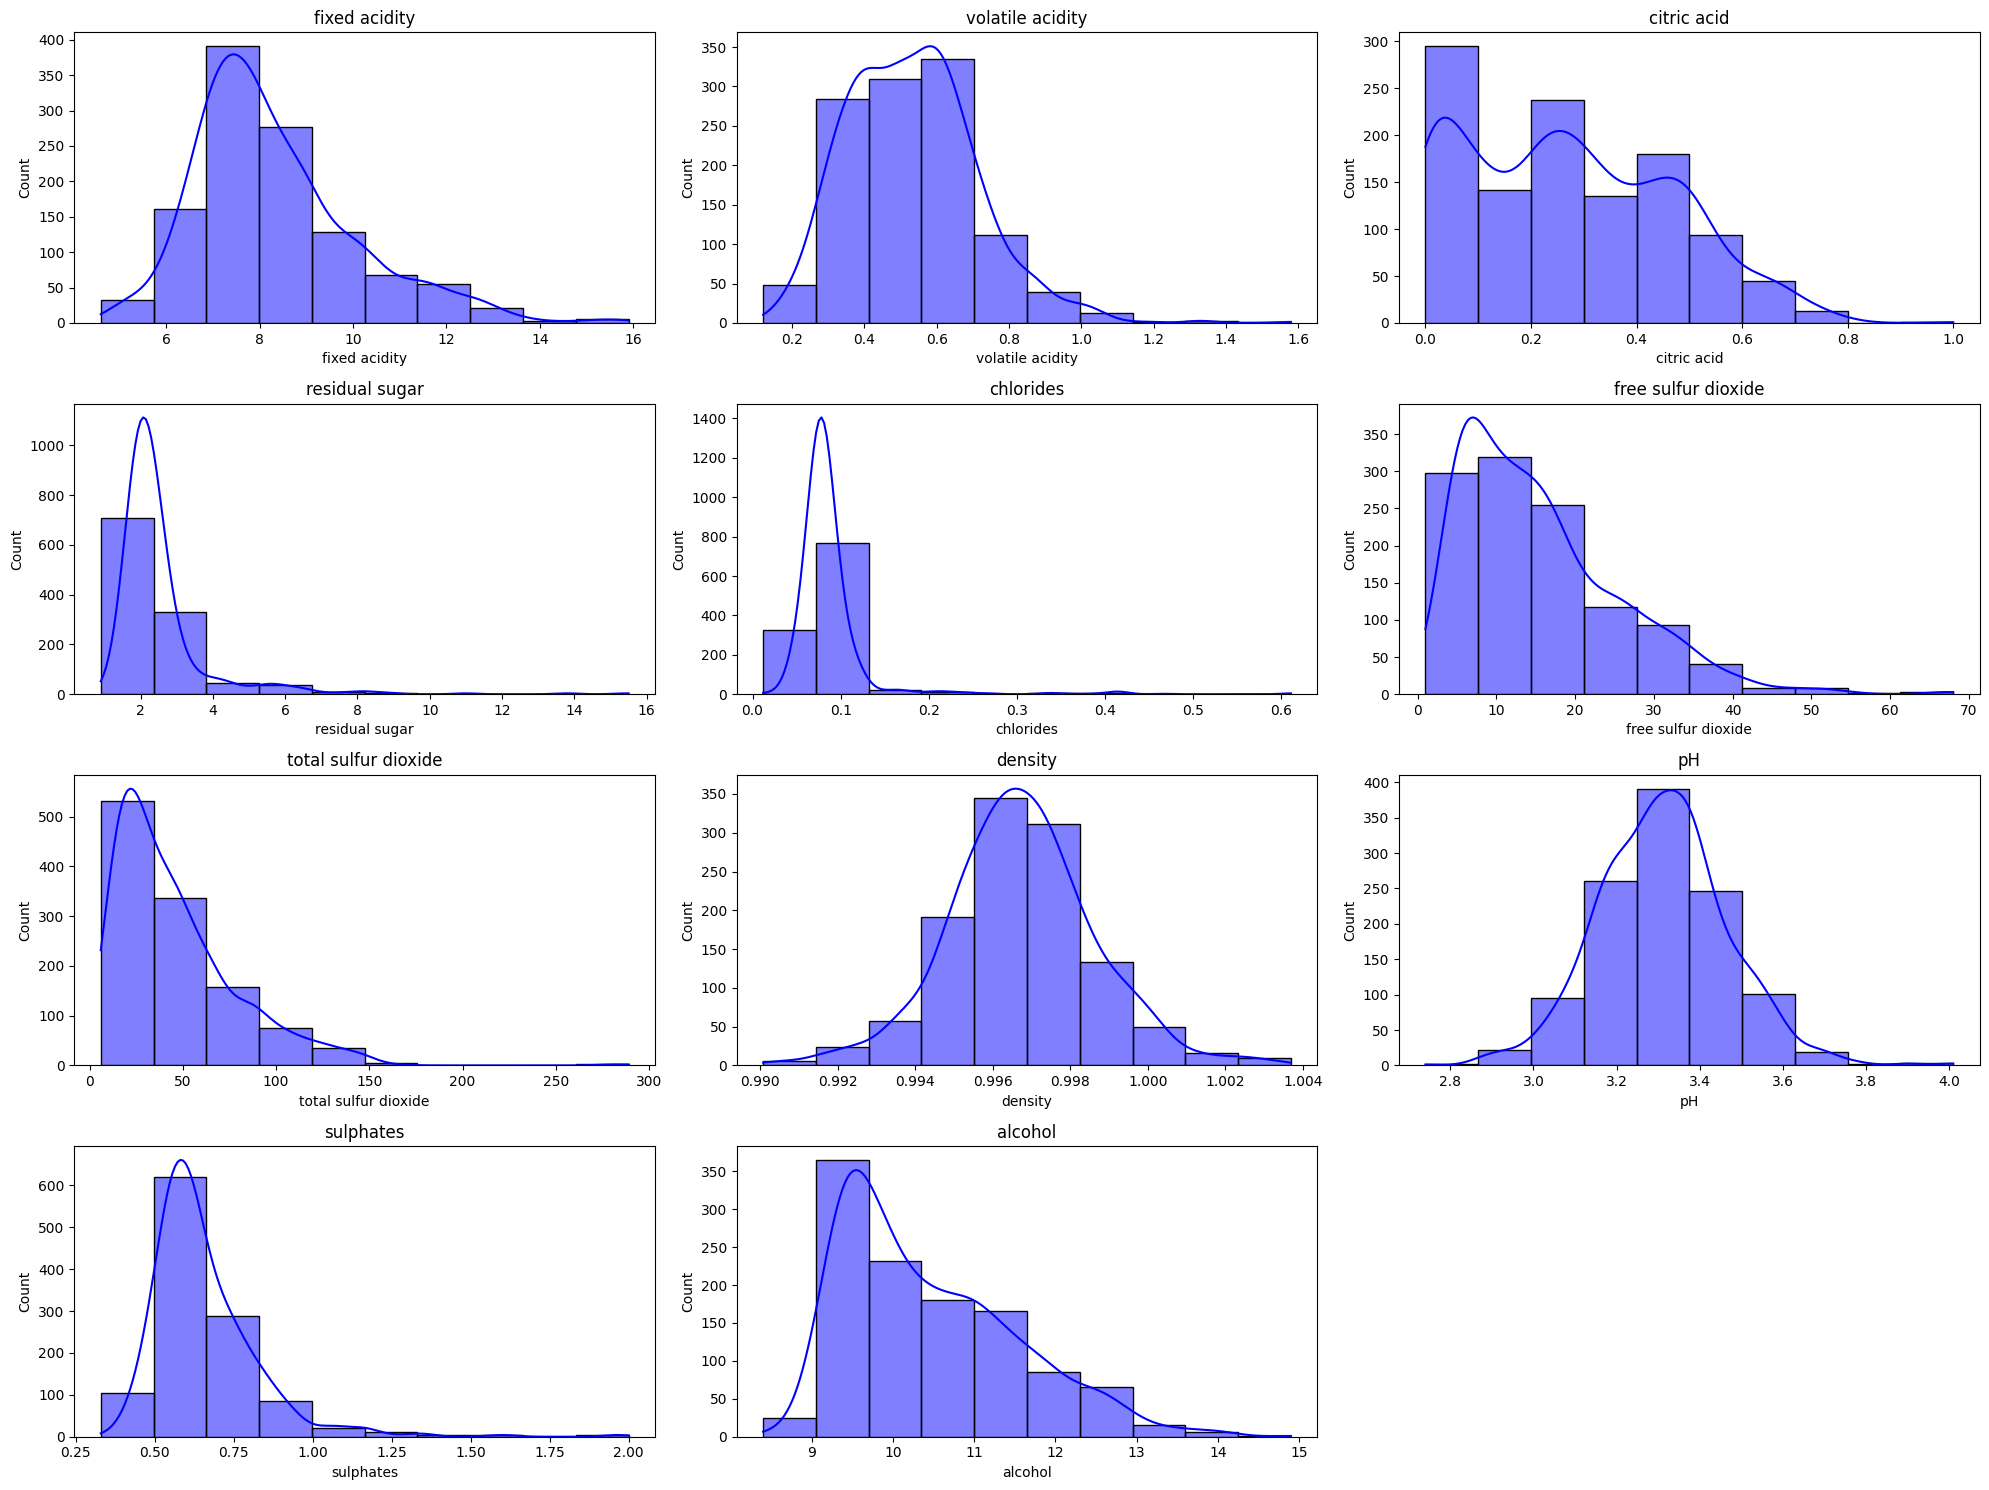

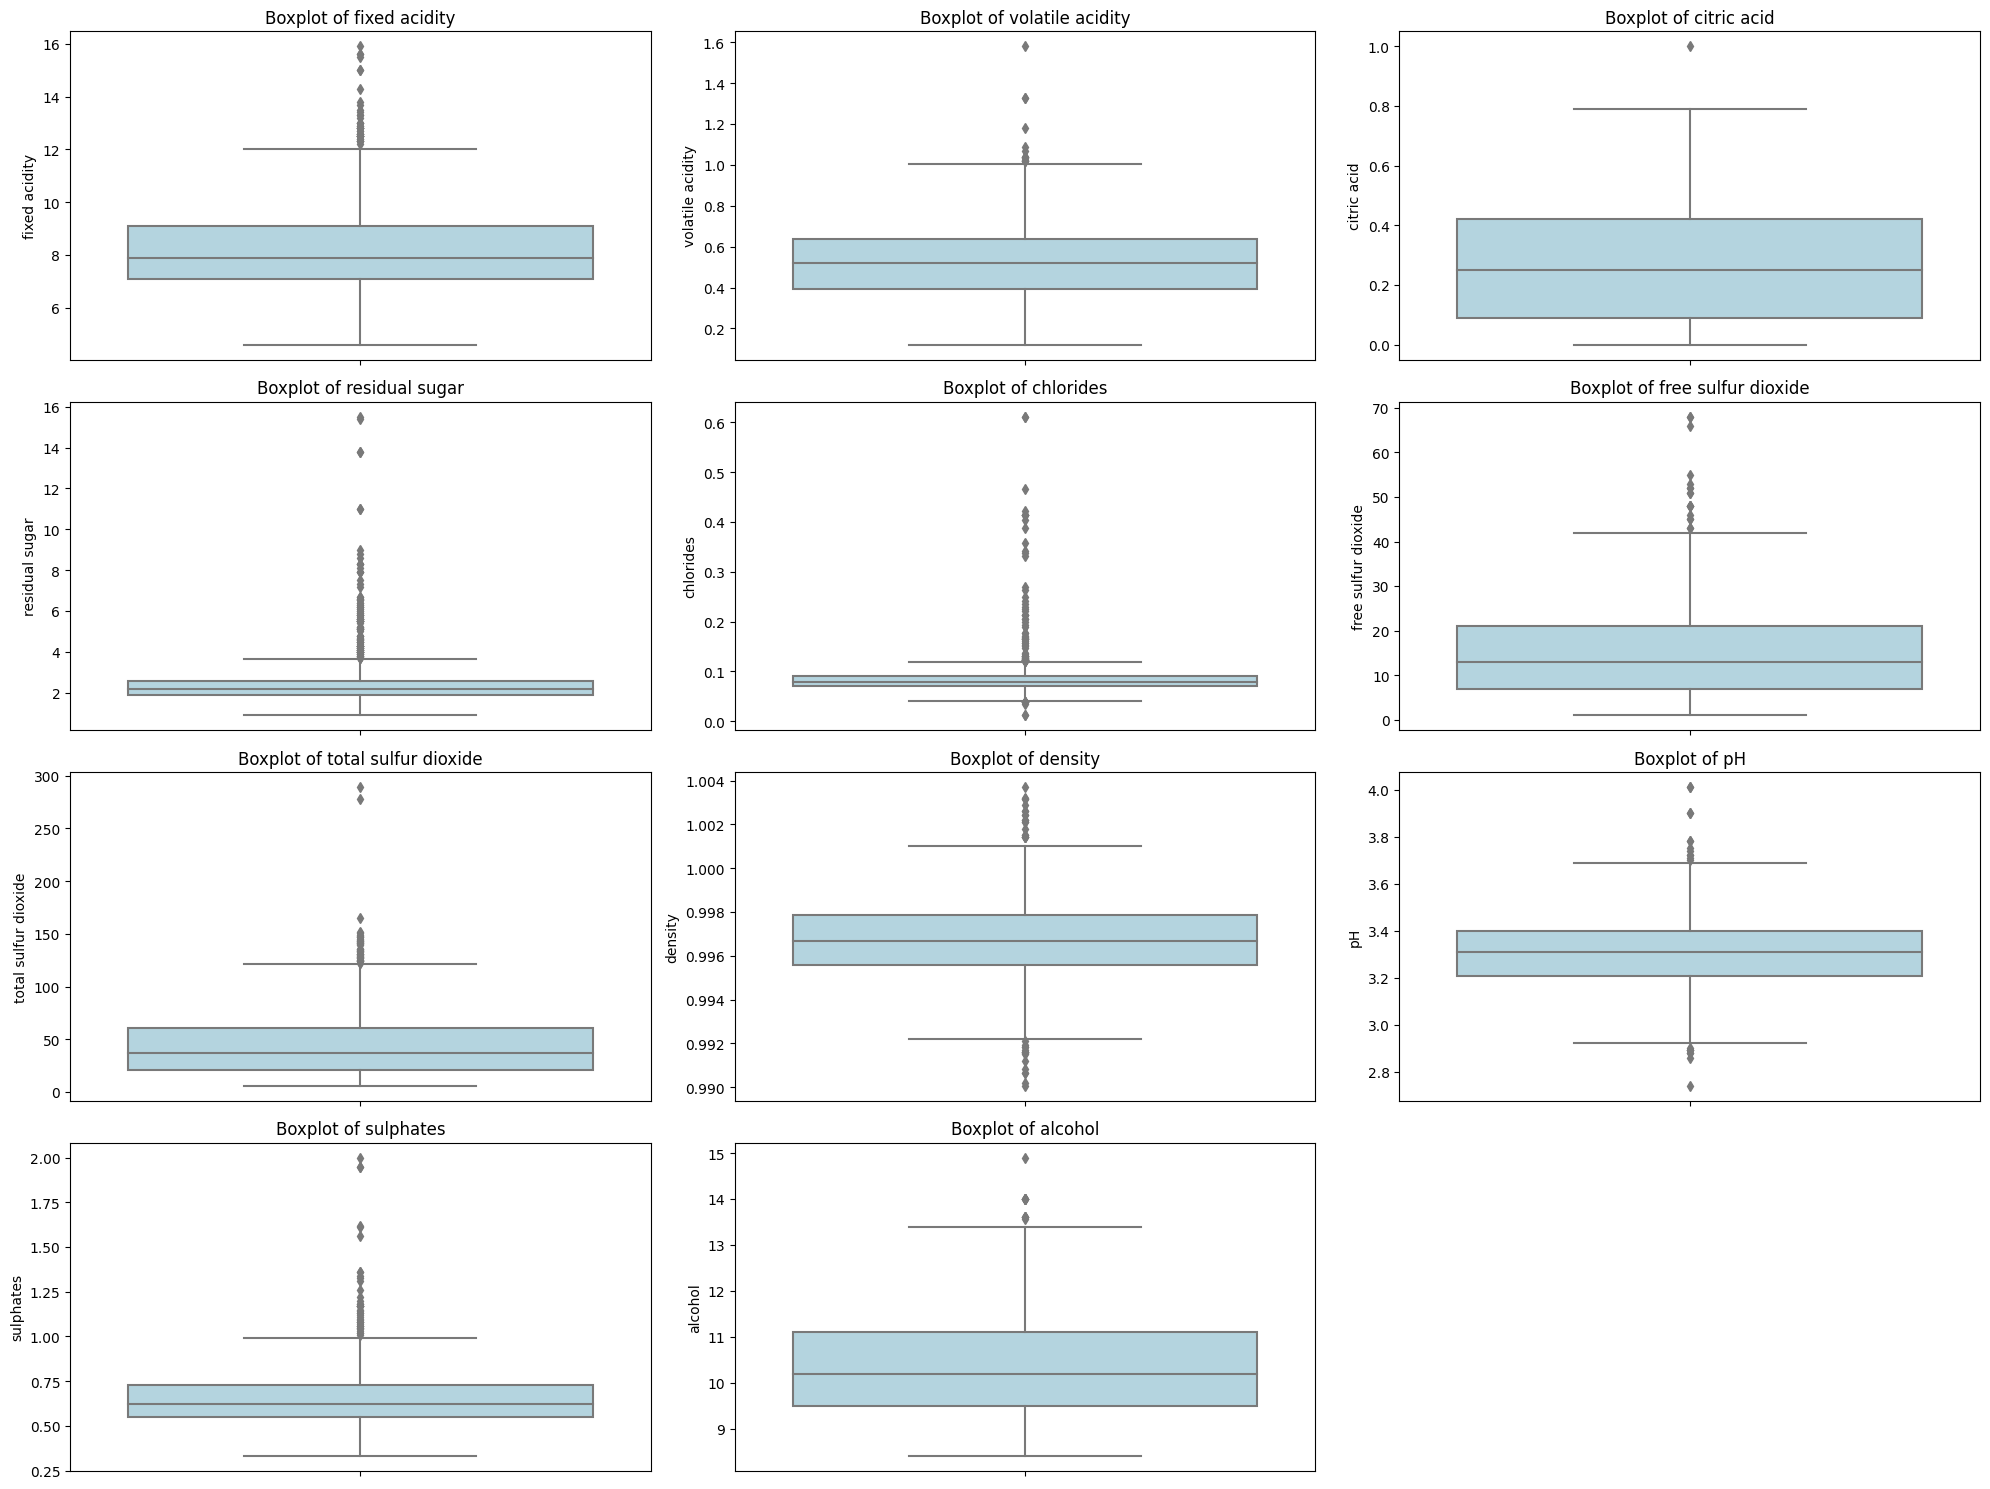

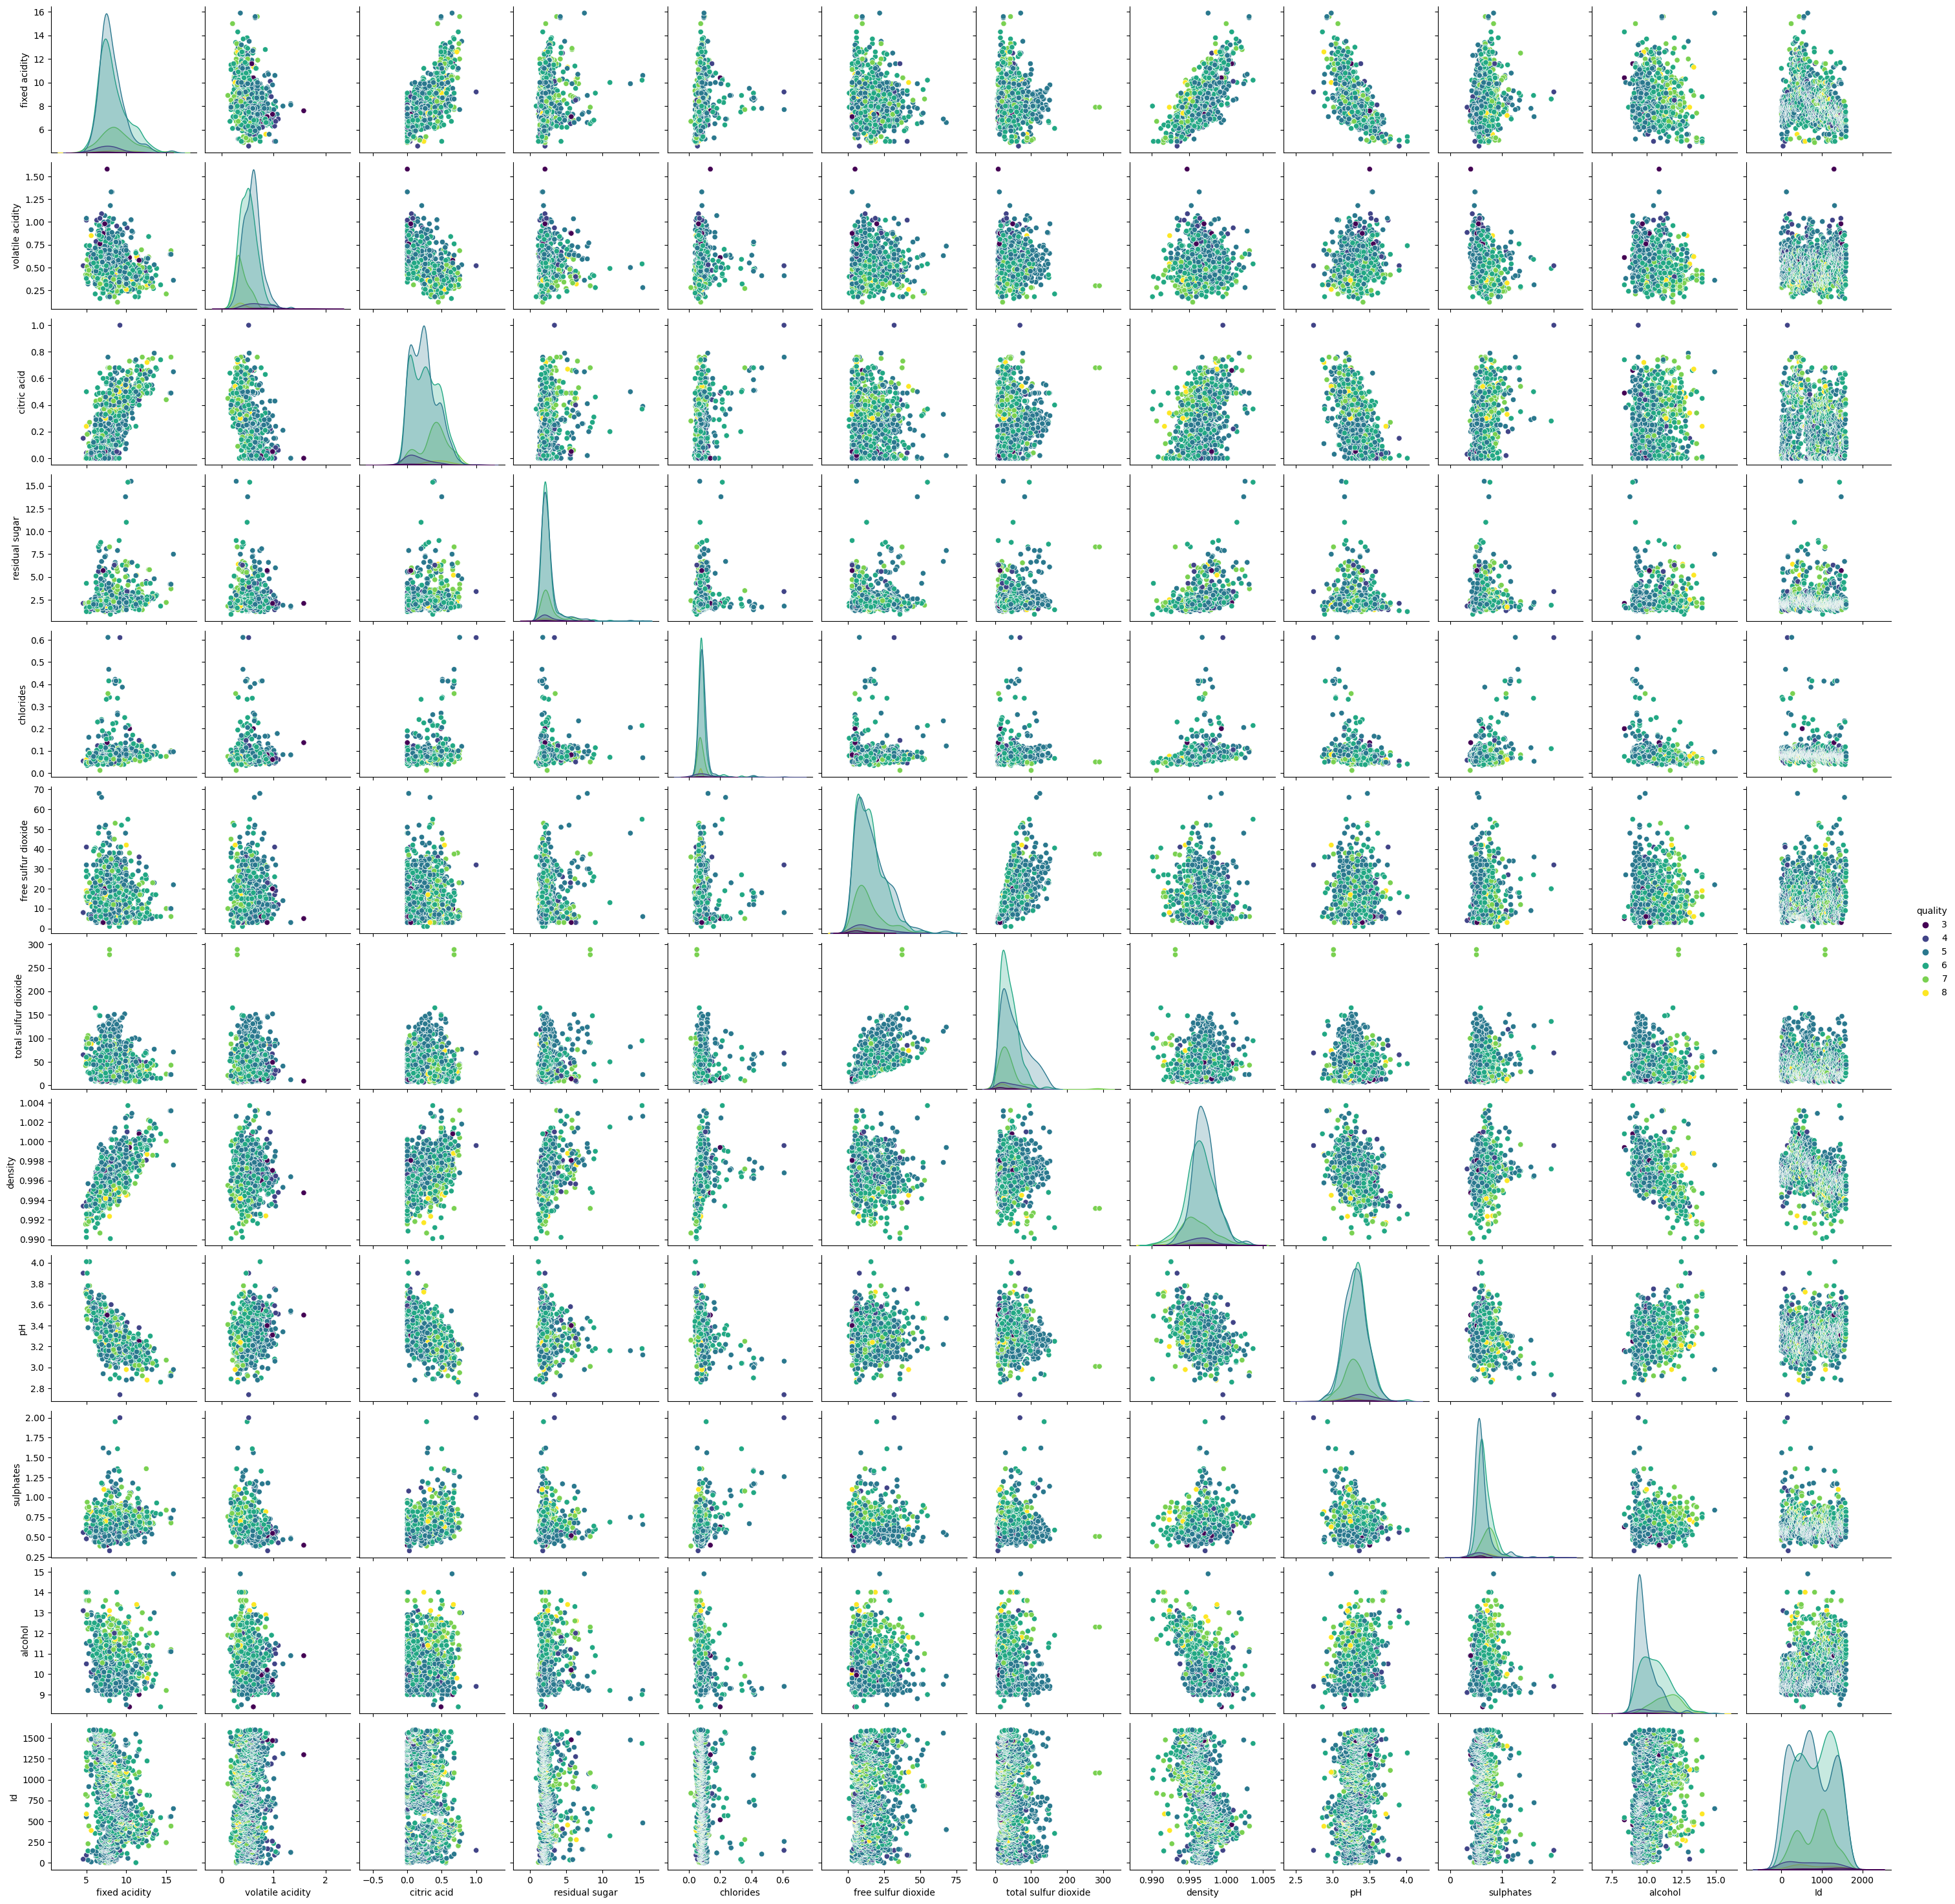

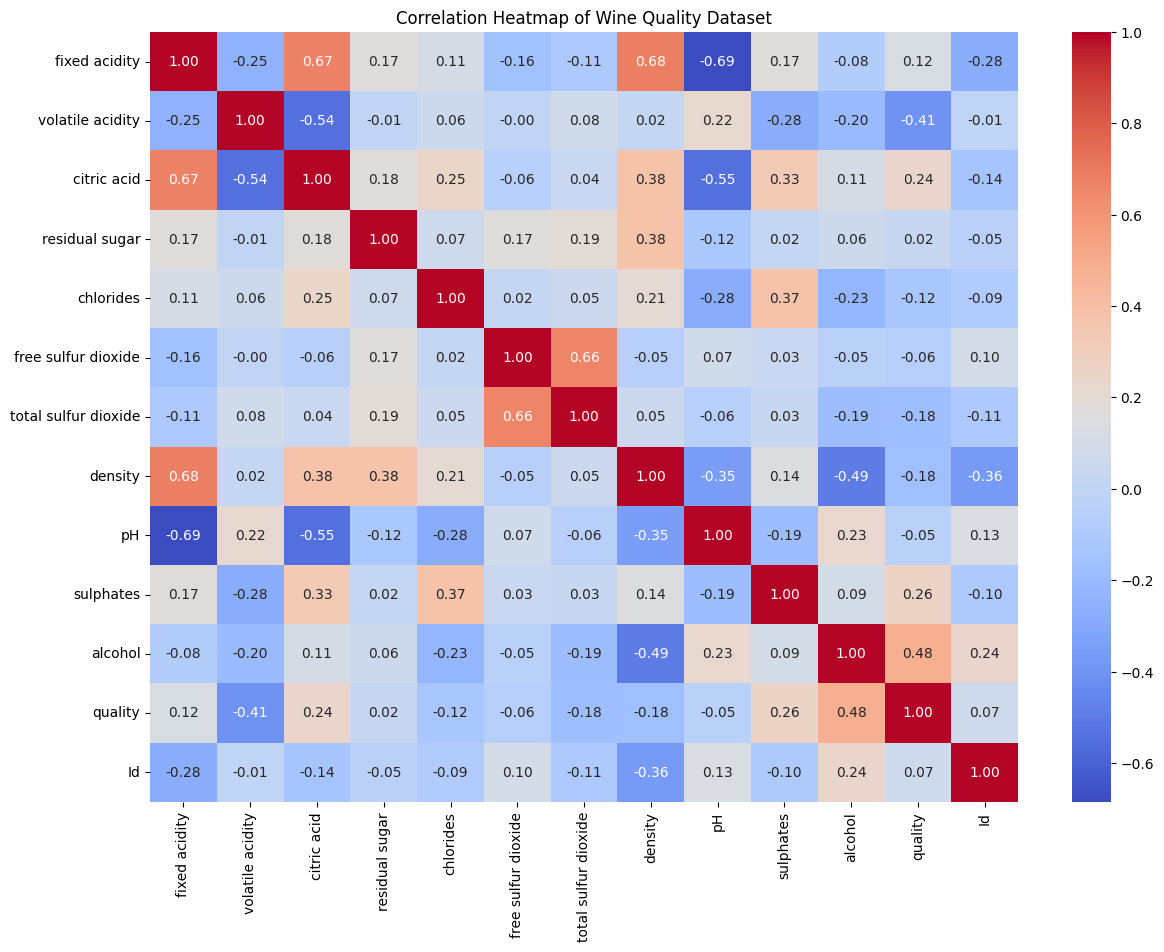

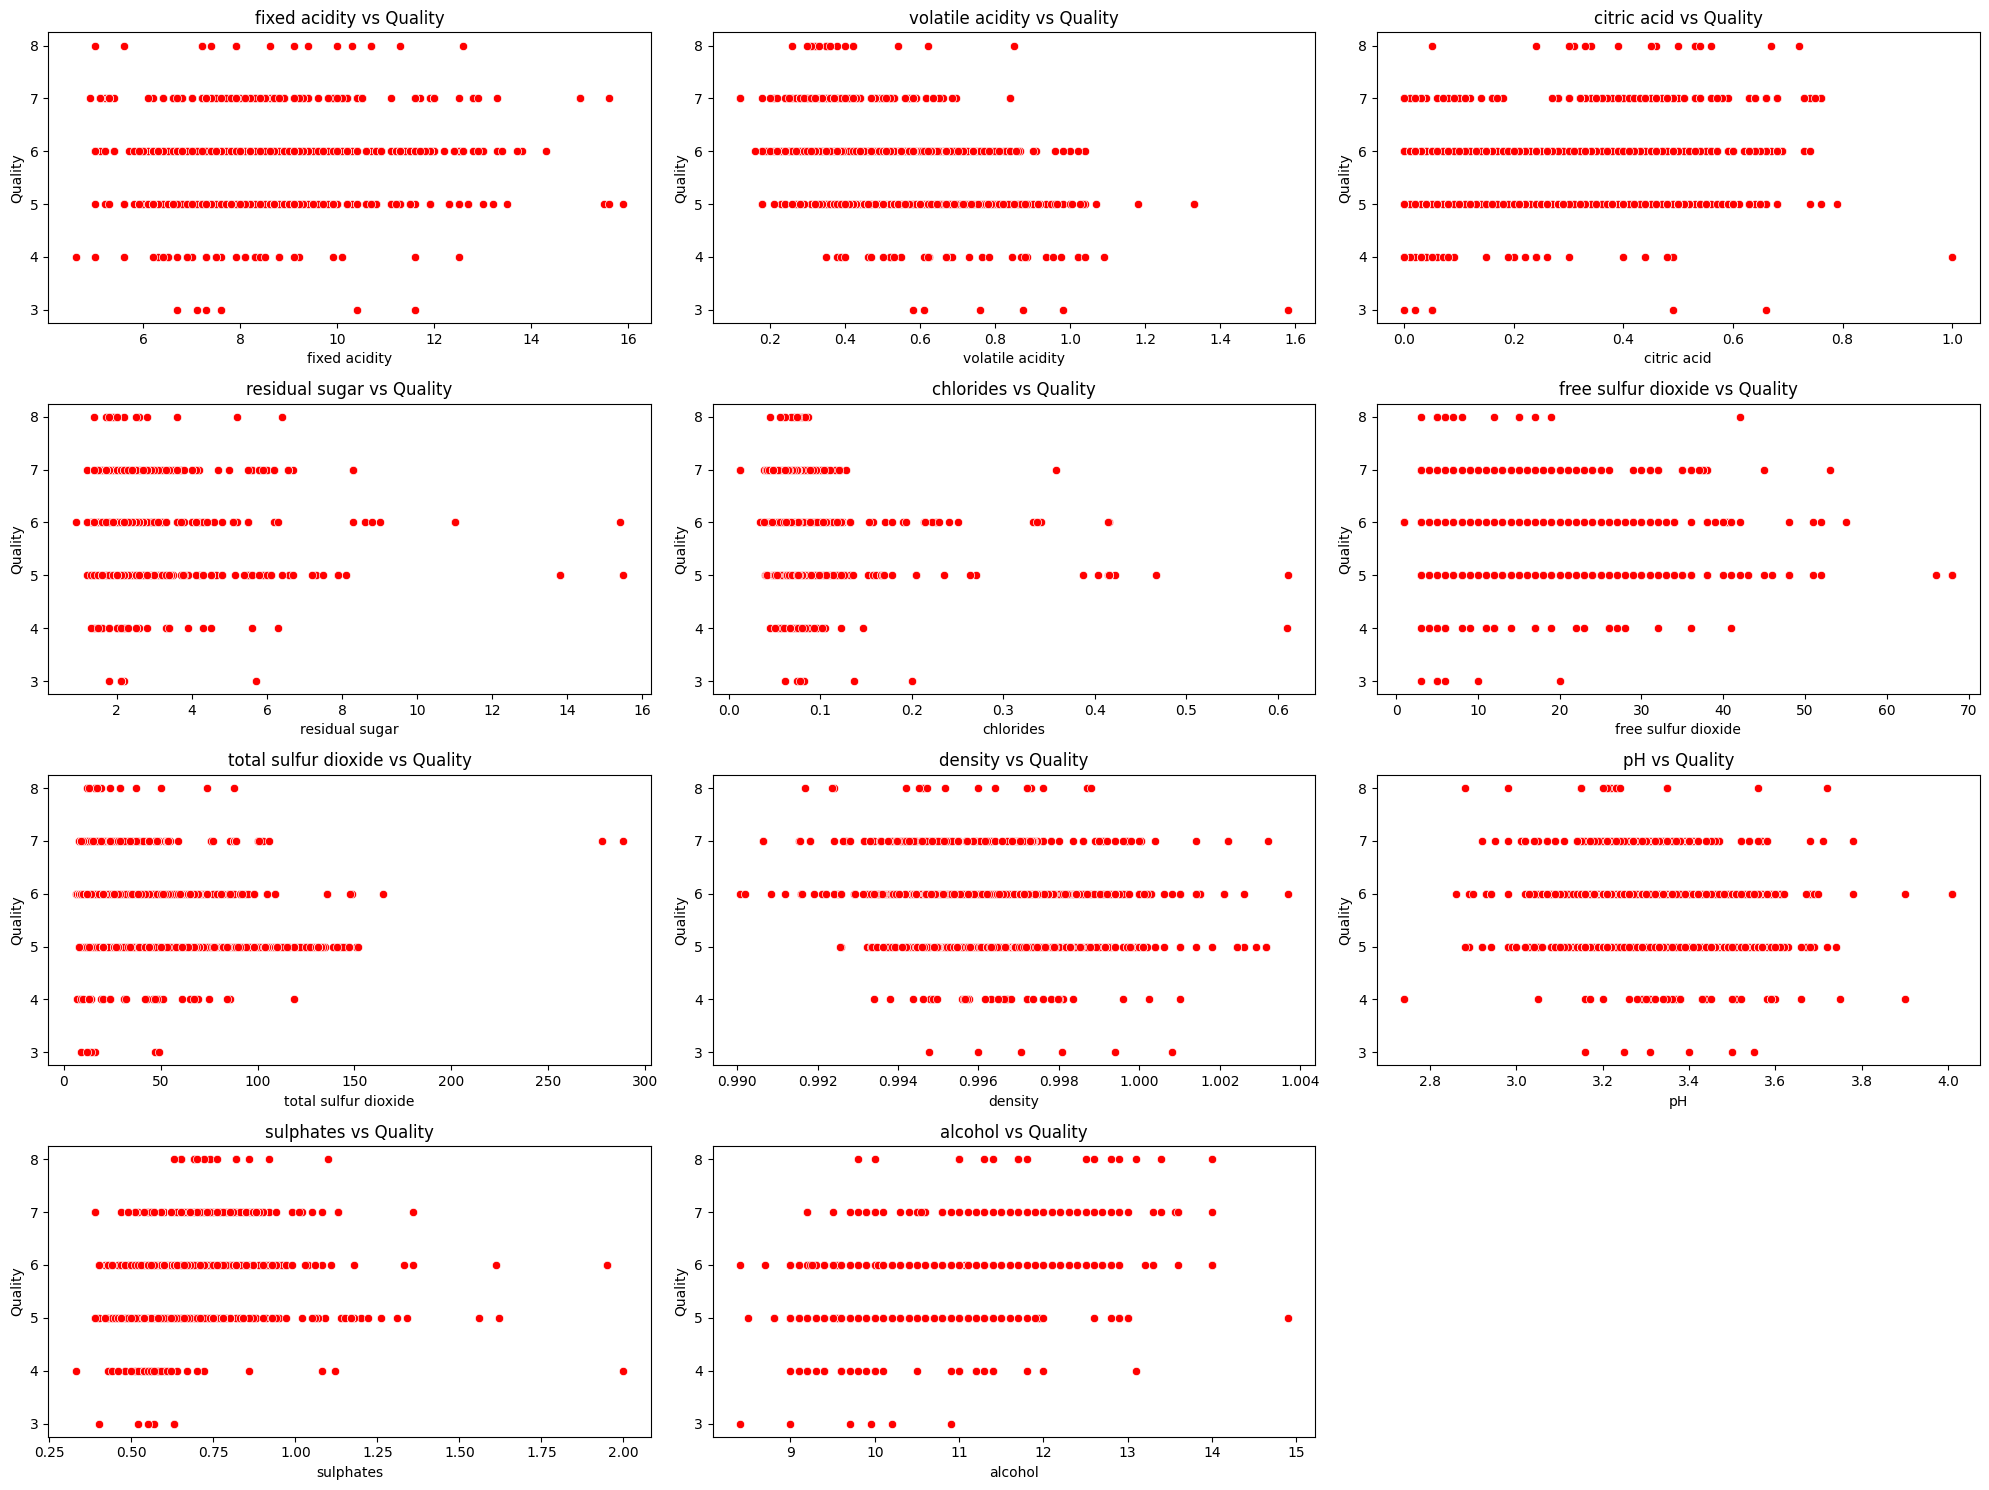

In [9]:

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


feature_names = df.columns[:-2]
num_features = len(feature_names)

plt.figure(figsize=(20, 15))
for i in range(num_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[feature_names[i]], bins=10, kde=True, color='blue')
    plt.title(feature_names[i])

plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 15))
for i in range(num_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[feature_names[i]], color='lightblue')
    plt.title(f'Boxplot of {feature_names[i]}')

plt.tight_layout()
plt.show()

sns.pairplot(df, hue='quality', palette='viridis')
plt.show()


plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.show()


plt.figure(figsize=(20, 15))
for i in range(num_features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=df[feature_names[i]], y=df['quality'], color='red')
    plt.title(f'{feature_names[i]} vs Quality')
    plt.xlabel(feature_names[i])
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()
